# Performance Matrix
Compare how different combinations of policies and morphologies perform, to validate that co-training policies and morphologies produces the optimal version for each.

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import gymnasium as gym

from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_checker import check_env

import Grasper
from Grasper.wrappers import BetterExploration, HandParams, TaskType
from agent import DAPG, PPO_ARGS

# Move up one directory
os.chdir("..")

In [2]:
def _make_env(env_id, hand_type, task_type):
    env = gym.make(env_id)
    env = BetterExploration(env)
    env = HandParams(env, hand_type)
    if task_type is not None:
        env = TaskType(env, task_type)
    env = gym.wrappers.FlattenObservation(env)
    env = Monitor(env)
    check_env(env)
    return env

ppo_args = PPO_ARGS.copy()
ppo_args["policy_kwargs"]["task_count"] = 5
ppo_args["verbose"] = 0

## Single-Task Matrices
Generate the matrices for the morphologies trained on single tasks.

In [3]:
pass

## Multi-Task Matrix
Generate a matrix for the morphologies trained on the multi-task environment.

#### Load each policy

#### For each policy, test it with each hand type

In [4]:
scores = np.zeros((6, 6))

# For each hand type
for hand_type in range(6):
    env = make_vec_env(lambda: _make_env("Grasper/Manipulation-v0", hand_type, None), n_envs=24, vec_env_cls=SubprocVecEnv)
    # For each policy
    for policy_idx in range(6):
        policy_path = f"models/hand_type_{policy_idx}_multi/ppo_grasper"
        model = DAPG.load(path=policy_path, env=env, **ppo_args)
        # Score each model by running it on the environment
        mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=1000, deterministic=True)
        del model
        print(f"Hand Type {hand_type} with Policy {policy_idx} scored {mean_reward} +/- {std_reward}")
        scores[policy_idx, hand_type] = mean_reward
    del env

Using cpu device
Loading baseline from models/baseline/baseline_model.pth
Hand Type 0 with Policy 0 scored 457.61589287099997 +/- 564.1746714829
Using cpu device
Loading baseline from models/baseline/baseline_model.pth
Hand Type 0 with Policy 1 scored 97.52979128599999 +/- 110.84135196391938
Using cpu device
Loading baseline from models/baseline/baseline_model.pth
Hand Type 0 with Policy 2 scored -51.902623337 +/- 138.45851448157953
Using cpu device
Loading baseline from models/baseline/baseline_model.pth
Hand Type 0 with Policy 3 scored 312.597216611 +/- 581.8671172317496
Using cpu device
Loading baseline from models/baseline/baseline_model.pth
Hand Type 0 with Policy 4 scored 187.21957238700003 +/- 505.14062421601756
Using cpu device
Loading baseline from models/baseline/baseline_model.pth
Hand Type 0 with Policy 5 scored 484.719214905 +/- 626.2376517396245
Using cpu device
Loading baseline from models/baseline/baseline_model.pth
Hand Type 1 with Policy 0 scored -50.220695572 +/- 234

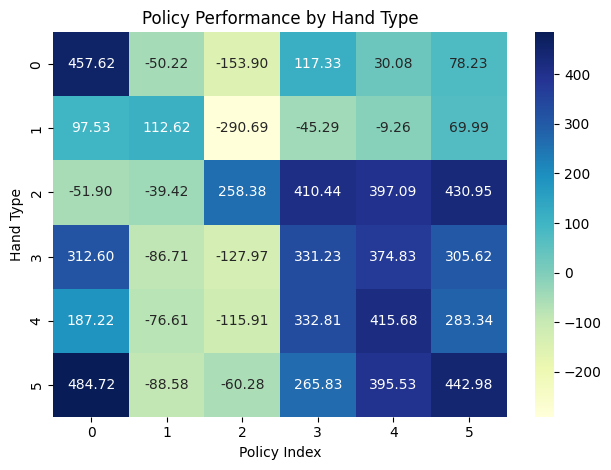

In [ ]:
# Generate a heatmap of the scores
sns.heatmap(scores, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True)
plt.title("Policy Performance by Hand Type")
plt.xlabel("Policy Index")
plt.ylabel("Hand Type")
plt.xticks(ticks=np.arange(6) + 0.5, labels=np.arange(6))
plt.yticks(ticks=np.arange(6) + 0.5, labels=np.arange(6))
plt.tight_layout()
plt.savefig("../diagrams/model_multitask_performance_heatmap.png")
plt.show()